In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import handy
import glob
from joblib import Parallel, delayed
import sigpy as sp
import sigpy.plot as pl
import sigpy.mri as mr
from scipy.io import loadmat
from scipy.io import savemat
import sys
import math
from scipy import signal
from itertools import product

In [2]:
path_caipi_data = '200403_caipi_pilot/'

In [3]:
datalist = sorted(glob.glob(path_caipi_data+"raw*.mat"))
datalist

['200403_caipi_pilot\\raw_001_full.mat',
 '200403_caipi_pilot\\raw_002_sense2x2.mat',
 '200403_caipi_pilot\\raw_003_sense2x3.mat',
 '200403_caipi_pilot\\raw_004_caipi2x2.mat',
 '200403_caipi_pilot\\raw_005_caipi2x3.mat',
 '200403_caipi_pilot\\raw_006_caipi2x2_fullcenter.mat',
 '200403_caipi_pilot\\raw_007_caipi2x3_fullcenter.mat']

In [4]:
fdata = handy.read_matlab(datalist[-2])

In [5]:
full = fdata['alldata']['real']+1j*fdata['alldata']['imag']

In [6]:
full.shape

(32, 116, 108, 108)

In [4]:
data_help = Parallel(n_jobs=-1,backend='loky')(delayed(handy.read_matlab)(datalist[i]) for i in range(len(datalist)))

In [5]:
data_complex = [data_help[i]['alldata']['real']+1j*data_help[i]['alldata']['imag'] for i in range(len(datalist))]

In [6]:
ksp = np.load('cartesian_ksp.npy')
ksp.shape

(8, 230, 180)

In [7]:
data_complex[6].shape

(32, 116, 108, 108)

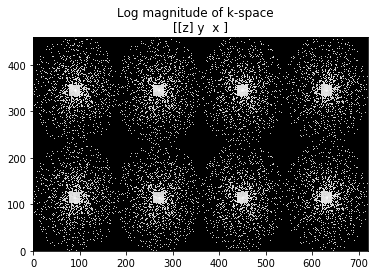

In [8]:
pl.ImagePlot(ksp, mode='l',z=0, title='Log magnitude of k-space')

In [12]:
data_complex[6].shape

(32, 116, 108, 108)

In [13]:
img_shift = sp.ifft(data_complex[0],axes=(1,2,3))
img_noshift = np.fft.fftshift(np.fft.ifftn(data_complex[0],axes=(1,2,3)),axes=(1,2,3))

In [14]:
imgk = full
imgfull = np.fft.fftshift(np.fft.ifftn(imgk,axes=(1,2,3)),axes=(2,3))

In [15]:
imgk = full
imgfull = sp.ifft(imgk,axes=(1,2,3))

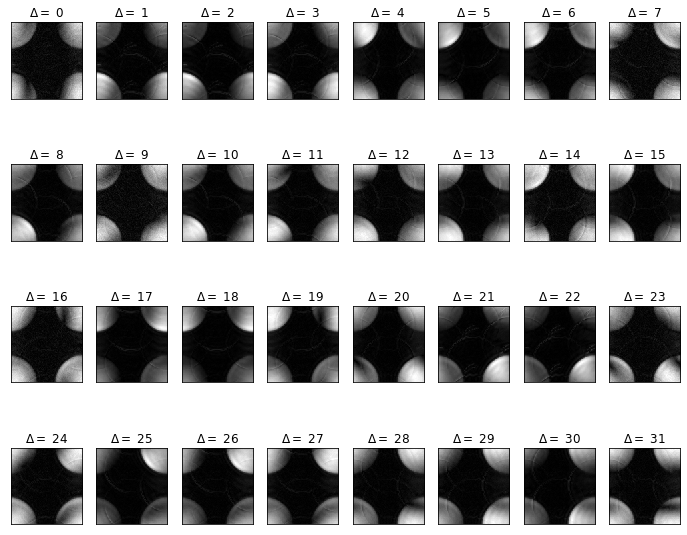

In [16]:
handy.plot_patterns(abs(imgfull[:,:,30,:]))

In [17]:
data_complex[5].shape

(32, 116, 108, 108)

In [8]:
def take_center(array,size):
    """Takes the center data of an array

    Parameters:
        array (numpy array): array of data
        size (int): percentage of the array

    Returns (numpy array): center of array 
    """
    size /= 200
    Nc,Nx,Ny,Nz = array.shape
    nx,ny,nz = int(Nx/2), int(Ny/2),int(Nz/2)
    rx,ry,rz = math.ceil(Nx*size), math.ceil(Ny*size), math.ceil(Nz*size)
    reduced = array[:,nx-rx:nx+rx,ny-ry:ny+ry,nz-rz:nz+rz]
    print(nx,ny,nz,rx,ry,rz)
    return reduced

In [19]:
centerk = take_center(data_complex[1],10)
print(centerk.shape,data_complex[1].shape)

29 54 26 3 6 3
(32, 6, 12, 6) (32, 58, 108, 53)


In [20]:
centerk[:3].shape

(3, 6, 12, 6)

In [21]:
espiritfull = mr.app.EspiritCalib(centerk[:10],kernel_width=6,show_pbar=True).run()

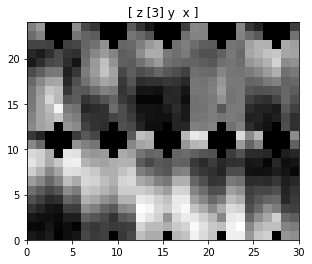

In [39]:
pl.ImagePlot(espiritfull,z=0)

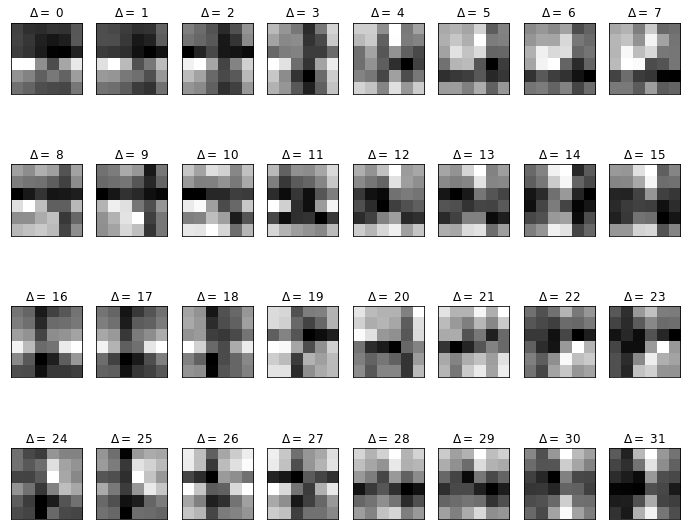

In [132]:
centerimg = sp.ifft(centerk,axes=(1,2,3))
handy.plot_patterns(abs(centerimg)[:,:,6,:],8)

In [9]:
datalist

['200403_caipi_pilot\\raw_001_full.mat',
 '200403_caipi_pilot\\raw_002_sense2x2.mat',
 '200403_caipi_pilot\\raw_003_sense2x3.mat',
 '200403_caipi_pilot\\raw_004_caipi2x2.mat',
 '200403_caipi_pilot\\raw_005_caipi2x3.mat',
 '200403_caipi_pilot\\raw_006_caipi2x2_fullcenter.mat',
 '200403_caipi_pilot\\raw_007_caipi2x3_fullcenter.mat']

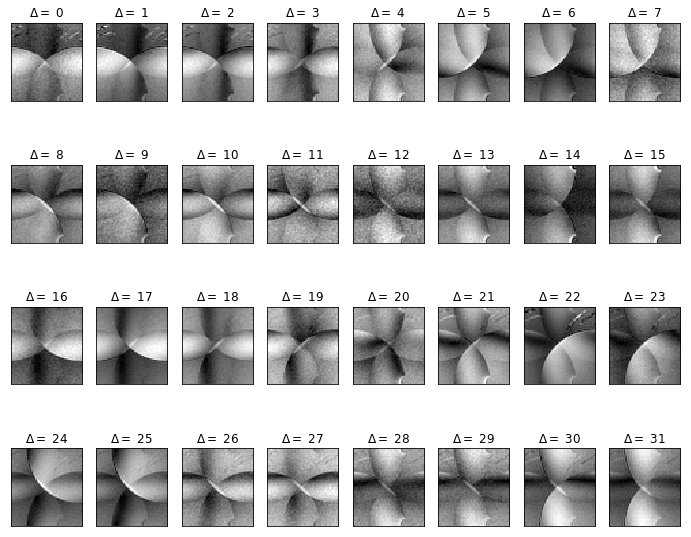

In [138]:

handy.plot_patterns(abs(img_shift)[:,:,50,:],8)

In [ ]:
signal.convolve()

In [9]:
path = 'raw_data.mat'
data = handy.read_matlab(path)
ksp = data['raw'].squeeze()
sdata = loadmat('sref.mat')
g=sdata['s_ref']
raw = ksp['real']+1j*ksp['imag']
sref=np.copy(g)

In [10]:
img_combined = np.sqrt(np.sum(abs(img)**2,axis=0))
plt.imshow(img_combined)

NameError: name 'img' is not defined

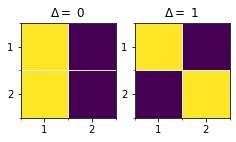

In [111]:
R=2
p=handy.caipi(R,1,[0,1])
handy.plot_caipi(p,[0,1])
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[0].T)
#mask=1

In [ ]:
s0 = img/img_combined
handy.plot_patterns(abs(s0),4,'jet')

In [465]:
Nx,Ny,Nz,Nc = 96,96,1,16
kernel = np.full((9,9),9**-2)
s1 = np.zeros((Nx,Ny,Nz,Nc))
for i in range(16):
    s1[:,:,0,i] = signal.convolve()

TypeError: convolve() missing 2 required positional arguments: 'in1' and 'in2'

In [3]:
path = 'raw_data.mat'
data = handy.read_matlab(path)
ksp = data['raw'].squeeze()
sdata = loadmat('sref.mat')
g=sdata['s_ref']
raw = ksp['real']+1j*ksp['imag']
sref=np.copy(g)

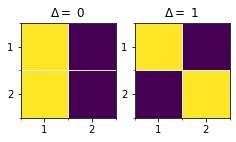

In [94]:
R=2
p=handy.caipi(R,1,[0,1])
handy.plot_caipi(p,[0,1])
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[1])
#mask=1

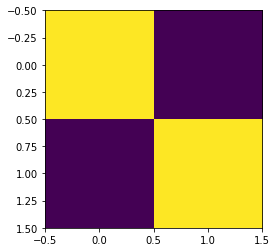

In [95]:
plt.imshow(abs(np.fft.fftn(p[1])))

In [99]:
psf = np.fft.fftn(p[1])
print(psf)
pos = np.argwhere(np.around(psf,2)!=0)
print(pos)
pos[:,1] *= int(96/2)
pos[:,0] *= int(96/2)
print(pos)

[[2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j]]
[[0 0]
 [1 1]]
[[ 0  0]
 [48 48]]


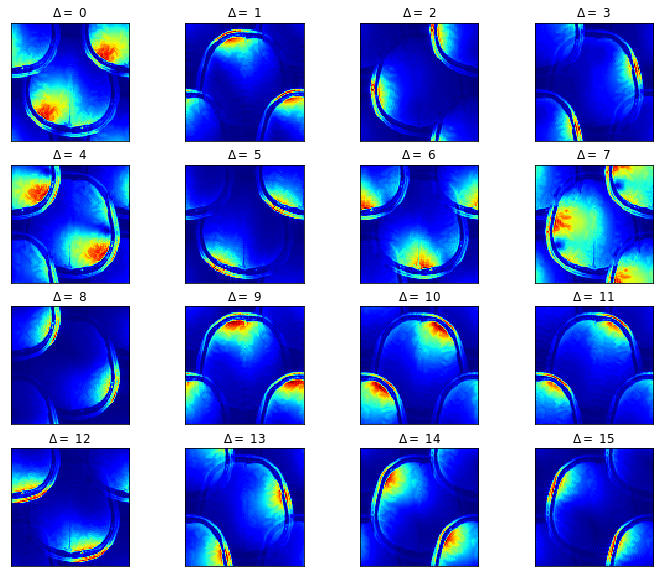

In [97]:
img = sp.ifft(mask*raw,axes=(1,2))
img_r2 = handy.swap(img)[:,:,None,:]
handy.plot_patterns(abs(img),4,'jet')

In [138]:
np.fft.fft(p[0])

array([[2.+0.j, 0.+0.j, 2.+0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j],
       [2.+0.j, 0.+0.j, 2.+0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.-0.j]])

In [118]:
g=np.moveaxis(img_r2,[0,1,2,3],[1,2,3,0])

In [128]:
%timeit handy.swap(img_r2)

1.95 ms ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
def sense(img,csm,R):
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    h = int(Nx/R)
    #print(h)
    for x in np.arange(h):
        x_idx = np.arange(x,Nx,h)
        
        for y in np.arange(Ny):
            S = csm[x_idx,y,0,:].T
            #S = np.reshape(csm[x_idx,y,0,:],(R,-1)).T
            hulp = np.reshape(img[x,y,0,:],(-1,1))
            out[x_idx,y] = (np.linalg.pinv(S)@hulp).squeeze()
        #print(S.shape,hulp.shape)
            #print(x_idx,y)
            
    return out

In [15]:
def sense3(img,csm,rx,ry):
    R = rx*ry
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    g = []
    for x in np.arange(hx): # loop along x-coordinates
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy): # loop along y-coordinates
            y_idx = np.arange(y,Ny,hy)[:]
            coord = np.array(list(product(x_idx,y_idx)))
            x_alias = csm[coord[:,0],coord[:,1],0,:]
            S = np.reshape(x_alias,(R,-1)).T
            g.append(S)
            hulp = np.reshape(img[x,y,0,:],(-1,1))
            vhelp = (np.linalg.pinv(S)@hulp).squeeze()
            #m = np.reshape(vhelp,(rx,ry))
            #print("this is m\n", m)
            out[coord[:,0],coord[:,1]] = vhelp
            #print(out[x_idx,:][:,y_idx])
            #print(x_idx,y,'and',x,y_idx)
    return out,g

In [87]:
def sense3d(img,csm,rx,ry):
    R = rx*ry
    [Nx,Ny,Nz,Nc] = img.shape
    out = np.zeros((Nx,Ny,Nz),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    Ncx,Ncy,Ncz,Nc = csm.shape
    
    for z in np.arange(Nz):
        for x in np.arange(hx): # loop along x-coordinates
            x_idx = np.arange(x,Nx,hx)
            for y in np.arange(hy): # loop along y-coordinates
                y_idx = np.arange(y,Ny,hy)[:]
                coord = np.array(list(product(x_idx,y_idx)))
                #print(coord)
                csm_aliased_points = csm[coord[:,0],coord[:,1],0,:]
                S = np.reshape(csm_aliased_points,(R,-1)).T
                hulp = np.reshape(img[x,y,z,:],(-1,1))
                vhelp = (np.linalg.pinv(S)@hulp).squeeze()
                #m = np.reshape(vhelp,(rx,ry))
                #print("this is m\n", m)
                out[coord[:,0],coord[:,1],z] = vhelp
                #print(out[x_idx,:][:,y_idx])
                #print(x_idx,y,'and',x,y_idx)
    return out.squeeze()

In [21]:
brain = np.repeat(img_r2,96,axis=2)
sref_repeat = np.repeat(sref,96,axis=2)

In [98]:
def sense3numpy(img,csm,rx,ry):
    rx,ry = 2,2
    R = rx*rx
    Nx,Ny,Nz,Nc = 96,96,96,16
    out = np.zeros((Nx,Ny,Nz),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix = np.zeros((hx,hy,R,2),dtype=int)
    csm_matrix = np.zeros((hx,hy,R,Nz,Nc),dtype=complex)
    S_matrix = np.zeros((hx,hy,Nz,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((hx,hy,Nz,Nc),dtype=complex)
    for x in np.arange(hx):
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy):
            y_idx = np.arange(y,Ny,hy)
            coord_matrix[x,y] = np.array(list(product(x_idx,y_idx)))
            csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],:,:]
            csm_matrix[x,y] = np.copy(csm_aliased_points)
            for z in np.arange(Nz):
                S = np.reshape(csm_matrix[x,y,:,z,:],(R,-1)).T
                hulp = np.reshape(img[x,y,z,:],(-1,1)).squeeze()
                S_matrix[x,y,z] = np.copy(S)
                hulp_matrix[x,y,z] = np.copy(hulp)
    S_all = np.reshape(S_matrix,(hx*hy*Nz,Nc,R))
    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(hx*hy*Nz,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(hx,hy,Nz,R))
    for i in range(hx):
        for j in range(hy):
            for z in range(Nz):
                out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1],z] = unfold_reshape[i,j,z].squeeze()
    return out

In [99]:
out_brain = sense3numpy(brain,sref_repeat,2,2)

In [73]:
def sense2numpy(img,csm,rx,ry):
    rx,ry = 2,2
    R = rx*rx
    Nx,Ny,Nz,Nc = img.shape
    out = np.zeros((Nx,Ny),dtype=complex)
    hx = int(Nx/rx)
    hy = int(Ny/ry)
    coord_matrix = np.zeros((hx,hy,R,2),dtype=int)
    csm_matrix = np.zeros((hx,hy,R,Nc),dtype=complex)
    S_matrix = np.zeros((hx,hy,Nc,R),dtype=complex)
    hulp_matrix = np.zeros((hx,hy,Nc),dtype=complex)
    for x in np.arange(hx):
        x_idx = np.arange(x,Nx,hx)
        for y in np.arange(hy):
            y_idx = np.arange(y,Ny,hy)
            coord_matrix[x,y] = np.array(list(product(x_idx,y_idx)))
            csm_aliased_points = csm[coord_matrix[x,y,:,0],coord_matrix[x,y,:,1],0,:]
            csm_matrix[x,y] = np.copy(csm_aliased_points)
            S = np.reshape(csm_matrix[x,y,:,:],(R,-1)).T
            hulp = np.reshape(img[x,y,:],(-1,1)).squeeze()
            S_matrix[x,y] = np.copy(S)
            hulp_matrix[x,y] = np.copy(hulp)
    S_all = np.reshape(S_matrix,(hx*hy,Nc,R))
    S_inv = np.linalg.pinv(S_all)
    hulp_all = np.reshape(hulp_matrix,(hx*hy,Nc))
    unfold = np.einsum('ijk,ik->ij',S_inv,hulp_all)
    unfold_reshape = np.reshape(unfold,(hx,hy,Nz,R))
    print(out[coord_matrix[0,0,:,0],coord_matrix[0,0,:,1]].shape)
    print(unfold_reshape[0,0,:].shape)
    for i in range(hx):
        for j in range(hy):
            out[coord_matrix[i,j,:,0],coord_matrix[i,j,:,1]] = unfold_reshape[i,j,:].squeeze()
    return out

In [94]:
img = sense2numpy(img_r2,sref,2,2)

(4,)
(1, 4)


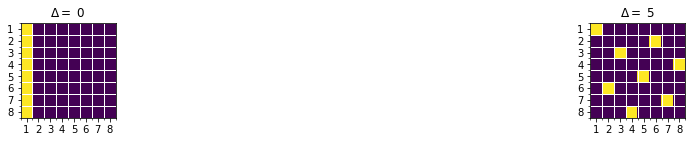

In [41]:
shifts = [0,1,2,3,4,5,6,7,8]
shifts = 0,5
R=8
p=handy.caipi(R,1,shifts)
handy.plot_caipi(p,shifts)
h = int(96/R)
mask = np.kron(np.ones((h,h)),p[1])
#mask=1

array([[0, 0],
       [1, 3],
       [2, 6],
       [3, 1],
       [4, 4],
       [5, 7],
       [6, 2],
       [7, 5]], dtype=int64)

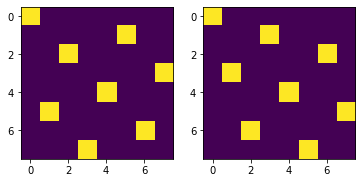

In [42]:
plt.subplot(1,2,1)
plt.imshow(p[1])
plt.subplot(1,2,2)
spatial_coord = abs((np.fft.fftn(p[1])))
plt.imshow(spatial_coord)
np.argwhere(np.around(spatial_coord,2)!=0)

In [339]:
brain = np.repeat(img_r2,96,axis=2)
sref_repeat = np.repeat(sref,96,axis=2)

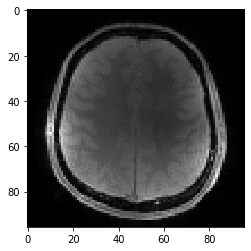

In [323]:
rec = sense3d(img_r2,sref,2,2)
plt.imshow(abs(rec),'gray')
